In [97]:
import pandas as pd

In [98]:
df = pd.read_csv('vg_sales_v2.csv')

In [ ]:
# Resources for ML codes
    https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard/notebook
# check scatter plot for outliers
# Find ratio of missing values in dataset
# Get rid of null Values
# delete unwanted columns
# find correlations using heat map
# get dummy variables
# Transforming target data to make it more distributed if needed
# decide my variables
# find appropriate models to use
# testing models
# tweak models

In [99]:
df['Publisher'].value_counts()

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Valve                              1
ITT Family Games                   1
Elite                              1
Evolution Games                    1
Red Flagship                       1
Name: Publisher, Length: 581, dtype: int64

In [100]:
# drop developer column since it is the same as publisher
df = df.drop(columns = ['Developer'])


In [67]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


In [68]:
df.shape

(16719, 15)

<AxesSubplot:xlabel='Critic_Score', ylabel='Global_Sales'>

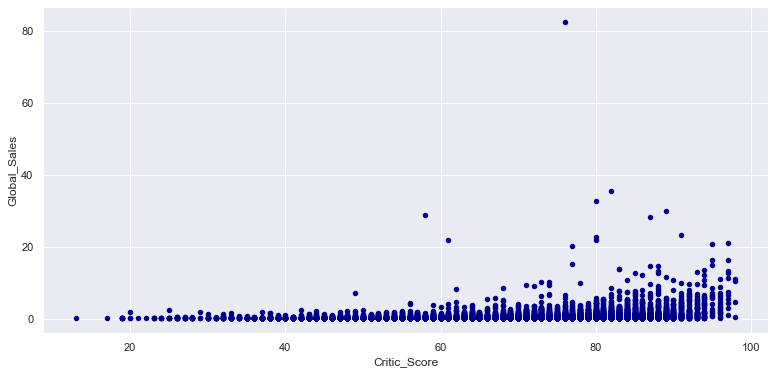

In [101]:
# scatter plot (looking for outliers)
df.plot.scatter(x='Critic_Score', y='Global_Sales', c='DarkBlue')

In [102]:
# dropped the outlier
df['Global_Sales'].max()
df = df.drop([0])

<AxesSubplot:xlabel='Critic_Score', ylabel='Global_Sales'>

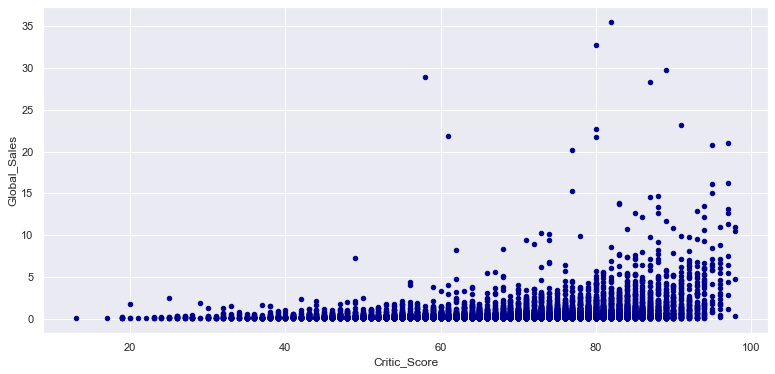

In [103]:
# scatter plot without outlier
df.plot.scatter(x='Critic_Score', y='Global_Sales', c='DarkBlue')


 mu = 0.53 and sigma = 1.41



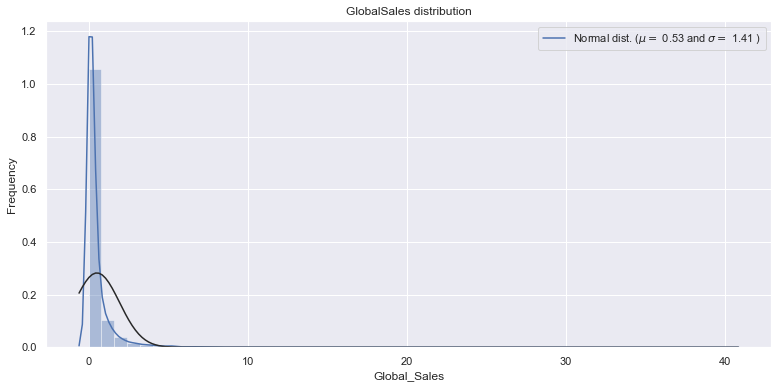

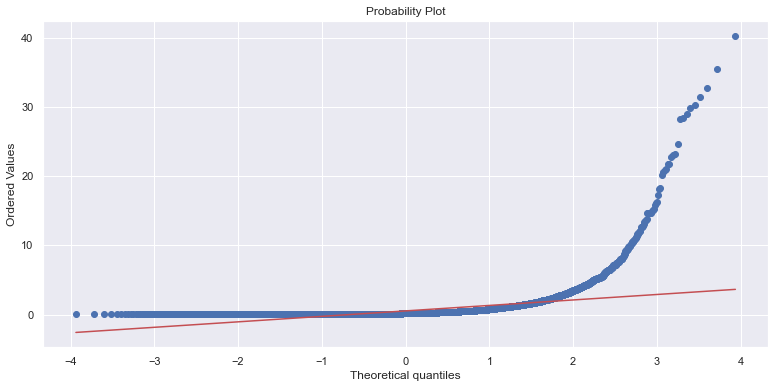

In [85]:
# code from source
import matplotlib.pyplot as plt  # Matlab-style plotting
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

sns.distplot(df['Global_Sales'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Global_Sales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('GlobalSales distribution')
sns.set(rc = {'figure.figsize':(13,6)})


#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Global_Sales'], plot=plt)
plt.show()

<AxesSubplot:xlabel='Global_Sales'>

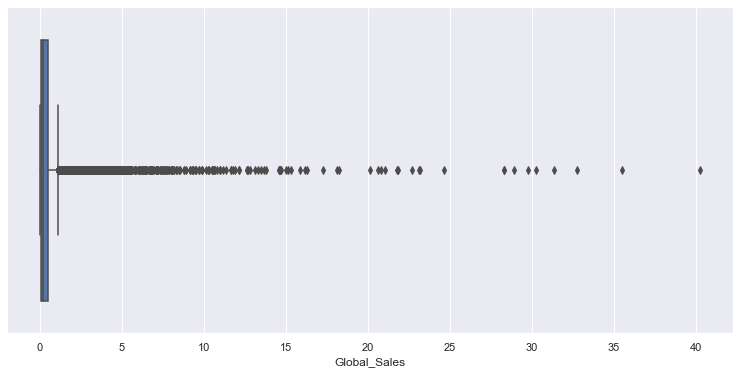

In [104]:
sns.boxplot(df.Global_Sales)

In [105]:
df.shape

(16718, 15)

In [92]:
# Find ratio of missing values in dataset
count = (df.isnull().sum() / len(df)) * 100
count = count.drop(count[count == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :count})
missing_data.head(20)

,Missing Ratio
User_Count,54.605814
Critic_Score,51.333892
Critic_Count,51.333892
Rating,40.489293
User_Score,40.100490
Year_of_Release,1.609044
Publisher,0.323005
Name,0.011963
Genre,0.011963


In [190]:
# cleaning up missing values for dataset (only used data from the year 2000 to current)
year = df[df['Year_of_Release'] >= 2000.0]
year.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,E


In [191]:
count = (year.isnull().sum() / len(df)) * 100
count = count.drop(count[count == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :count})
missing_data.head(20)

,Missing Ratio
User_Count,42.487140
Critic_Score,39.400646
Critic_Count,39.400646
Rating,28.771384
User_Score,28.322766
Publisher,0.191410


In [192]:
year.shape

(14473, 15)

In [193]:
# Since I do not want to fill average values for 40% of data, I dropped all na values for 'Critic_Score')
year = year.dropna(subset = ['Critic_Score'])

In [194]:
count = (year.isnull().sum() / len(df)) * 100
count = count.drop(count[count == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :count})
missing_data.head(20)

,Missing Ratio
User_Count,6.430195
Rating,0.466563
User_Score,0.155521
Publisher,0.005982


In [195]:
year.shape

(7886, 15)

In [196]:
# changing value to none
year['User_Score'] = year['User_Score'].replace('tbd', None)

In [197]:
# Filling missing values with mode
year['User_Count'] = year['User_Count'].fillna(year['User_Count'].mode()[0])
year['Rating'] = year['Rating'].fillna(year['Rating'].mode()[0])
year['User_Score'] = year['User_Score'].fillna(year['User_Score'].mode()[0])
year['Publisher'] = year['Publisher'].fillna(year['Publisher'].mode()[0])

In [198]:
# All na values are filled in the model dataset
count = (year.isnull().sum() / len(df)) * 100
count = count.drop(count[count == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :count})
missing_data.head(20)

,Missing Ratio


In [199]:
year.shape

(7886, 15)

In [200]:
# Getting dummies
year = pd.get_dummies(data = year, columns=['Platform', 'Genre', 'Rating'])

In [201]:
year.head()

,Name,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,...,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_AO,Rating_E,Rating_E10+,Rating_M,Rating_RP,Rating_T
2,Mario Kart Wii,2008.0,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,...,0,0,0,0,0,1,0,0,0,0
3,Wii Sports Resort,2009.0,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,...,0,0,1,0,0,1,0,0,0,0
6,New Super Mario Bros.,2006.0,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,...,0,0,0,0,0,1,0,0,0,0
7,Wii Play,2006.0,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,...,0,0,0,0,0,1,0,0,0,0
8,New Super Mario Bros. Wii,2009.0,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,...,0,0,0,0,0,1,0,0,0,0


In [202]:
year.columns

Index(['Name', 'Year_of_Release', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Platform_3DS',
       'Platform_DC', 'Platform_DS', 'Platform_GBA', 'Platform_GC',
       'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3',
       'Platform_PS4', 'Platform_PSP', 'Platform_PSV', 'Platform_Wii',
       'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne',
       'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc',
       'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing',
       'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy',
       'Rating_AO', 'Rating_E', 'Rating_E10+', 'Rating_M', 'Rating_RP',
       'Rating_T'],
      dtype='object')

In [203]:
# dropping columns that we don't need for the model
year = year.drop(['Name', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis = 1)

In [204]:
year.shape

(7886, 41)

In [238]:
# defining variables for model
X = year[['Year_of_Release', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Platform_3DS',
       'Platform_DC', 'Platform_DS', 'Platform_GBA', 'Platform_GC',
       'Platform_PC', 'Platform_PS', 'Platform_PS2', 'Platform_PS3',
       'Platform_PS4', 'Platform_PSP', 'Platform_PSV', 'Platform_Wii',
       'Platform_WiiU', 'Platform_X360', 'Platform_XB', 'Platform_XOne',
       'Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc',
       'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing',
       'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy',
       'Rating_AO', 'Rating_E', 'Rating_E10+', 'Rating_M', 'Rating_RP',
       'Rating_T']]

y = year[['Global_Sales']]

In [239]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [241]:
# Used the log function to help transform the data and have it be more evenly distributed
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column 
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)


 mu = 0.28 and sigma = 0.26



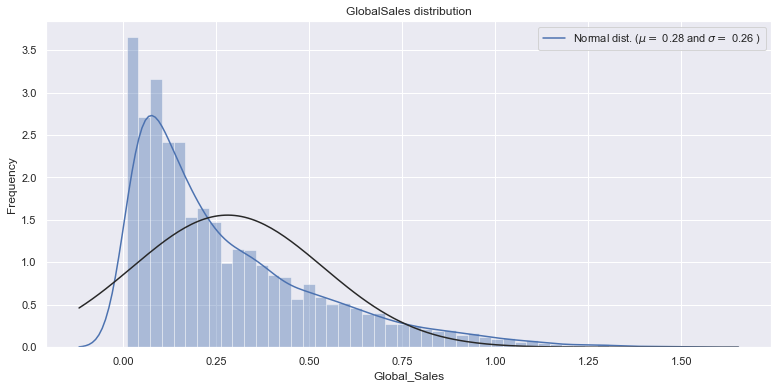

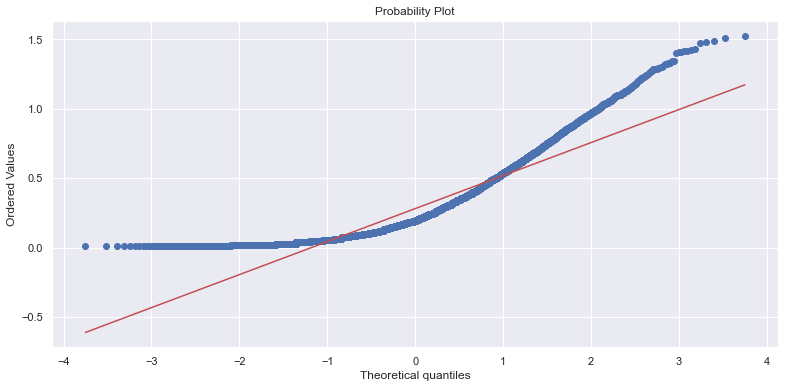

In [245]:
import numpy as np
year['Global_Sales'] = np.log1p(year["Global_Sales"])

sns.distplot(year['Global_Sales'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(year['Global_Sales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('GlobalSales distribution')
sns.set(rc = {'figure.figsize':(13,6)})


#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(year['Global_Sales'], plot=plt)
plt.show()

In [282]:
# multiple linear regression (NMAE)
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

lm_avg = np.mean(cross_val_score(lm, X_train, y_train, scoring = "neg_mean_absolute_error", cv = 3))

print("Avg cross-validation score: {:.4f}".format(lm_avg))
lm_score = lm.score(X_test, y_test)
print("Test set score: {:.4f}".format(lm_score))

Avg cross-validation score: -0.2284
Test set score: 0.4178


In [283]:
lm_avg

-0.228406589895248

In [254]:
# Lasso (NMAE)
lm_l = Lasso()
lm_l.fit(X_train, y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring = "neg_mean_absolute_error", cv = 3))

-0.2554518734695685

In [249]:
# random forest regressor (NMAE)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf, X_train, y_train, scoring = "neg_mean_absolute_error", cv = 3))

-0.1868165793481266

In [256]:
# tuning models with gridsearch cv
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': range(10, 100, 10), 'criterion': ('mse', 'mae'), 'max_features': ('auto', 'sqrt', 'log2')}

gs = GridSearchCV(rf, parameters, scoring = 'neg_mean_absolute_error', cv = 3)
gs.fit(X_train, y_train)

gs.best_score_
gs.best_estimator_

RandomForestRegressor(n_estimators=80)

In [257]:
# gs random forest regressor ^ (improved a little bit)
gs.best_score_

-0.18596573376371625

In [260]:
# test ensembles
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, tpred_lm)

0.2359958921424557

In [261]:
mean_absolute_error(y_test, tpred_rf)

0.183671909446875

In [262]:
mean_absolute_error(y_test, tpred_lml)

0.2676694196118004

In [280]:
# improving Lasso with gridsearchCV 
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

parameter = [
    {'alpha': [10, 1, 0.1, 0.01, 0.001, 0.0001], 'max_iter': [1000000, 100000, 10000, 1000]}
]

gs_lasso = GridSearchCV(lm_l, parameter, scoring='neg_mean_absolute_error', cv = 3)
gs_lasso.fit(X_train, y_train)
print("Best parameters: {}".format(gs_lasso.best_params_))
lasso_best_cross_val_score = gs_lasso.best_score_
print("Best cross-validation score: {:.4f}".format(lasso_best_cross_val_score))
lasso_score = gs_lasso.score(X_test, y_test)
print("Test set score: {:.4f}".format(lasso_score))

Best parameters: {'alpha': 0.001, 'max_iter': 1000000}
Best cross-validation score: -0.2280
Test set score: -0.2357


In [274]:
# gs lasso ^ (previous was -.25545) 
gs_lasso.best_score_

-0.22796031095336955

In [275]:
# gs lasso ^
gs_lasso.score(X_test, y_test)

-0.23574531828780865

In [290]:
# Gradient Boosting Regressor (NMAE)
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
np.mean(cross_val_score(gbr, X_train, y_train, scoring = "neg_mean_absolute_error", cv = 3))

-0.1880489431452003

In [291]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

parameter = [
    {'n_estimators': [200, 225, 250, 275], 'max_features': [6, 8, 10, 12], 'max_depth': [5, 7, 9]}
]

gs_gbr = GridSearchCV(GradientBoostingRegressor(), parameter, scoring='neg_mean_absolute_error', cv = 3)
gs_gbr.fit(X_train, y_train)
print("Best parameters: {}".format(gs_gbr.best_params_))
gbr_best_cross_val_score = gs_gbr.best_score_
print("Best cross-validation score: {:.4f}".format(gbr_best_cross_val_score))
gbr_score = gs_gbr.score(X_test, y_test)
print("Test set score: {:.4f}".format(gbr_score))

Best parameters: {'max_depth': 7, 'max_features': 10, 'n_estimators': 90}
Best cross-validation score: -0.1791
Test set score: -0.1805


In [277]:
# gs gradient boosting regressor ^
gs_gbr.best_score_

-0.17824938361915313

In [278]:
# gs gradient boosting regressor ^
gs_gbr.score(X_test, y_test)

-0.1803608521226399

In [292]:
# Gradient Boosting Regressor (changing the parameters, the same paramters from rf gridsearchCV above ^)
from sklearn.ensemble import GradientBoostingRegressor

parameter = {'n_estimators': range(10, 100, 10), 'criterion': ('mse', 'mae'), 'max_features': ('auto', 'sqrt', 'log2')}

gs_gbr = GridSearchCV(GradientBoostingRegressor(), parameter, scoring='neg_mean_absolute_error', cv = 3)
gs_gbr.fit(X_train, y_train)
print("Best parameters: {}".format(gs_gbr.best_params_))
gbr_best_cross_val_score = gs_gbr.best_score_
print("Best cross-validation score: {:.4f}".format(gbr_best_cross_val_score))
gbr_score = gs_gbr.score(X_test, y_test)
print("Test set score: {:.4f}".format(gbr_score))

Best parameters: {'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 90}
Best cross-validation score: -0.1843
Test set score: -0.1899
